In [1]:
# import lib
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt

In [2]:
# read the dataset
df = pd.read_excel("./datamaster.xlsx", sheet_name="2017_kab")
# Show dataset
df

,No,Kabupaten_Kota,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,Areal_perkebunan_rakyat,Areal_perkebunan_pemerintah,Areal_perkebunan_swasta,TBM,TM,TR
0,1,Kab Aceh Besar,3375.0,701.0,200.0,3607.0,NaN,NaN,NaN,2834.0,284.0,257.0
1,2,Kab Pidie,10383.0,596.0,2487.0,12642.0,NaN,NaN,NaN,2497.0,4171.0,3715.0
2,3,Kab Pidie Jaya,14980.0,778.0,4556.0,1737.0,NaN,NaN,NaN,4054.0,5857.0,5069.0
3,4,Kab Bireun,7384.0,653.0,1899.0,10917.0,NaN,NaN,NaN,2664.0,2909.0,1811.0
4,5,Kab Aceh Tengah,580.0,609.0,193.0,877.0,NaN,NaN,NaN,34.0,316.0,230.0
...,...,...,...,...,...,...,...,...,...,...,...,...
429,430,Kab. Kaimana,79.0,86.0,4.0,226.0,NaN,NaN,NaN,NaN,43.0,36.0
430,431,Kota Sorong,37.0,140.0,5.0,47.0,NaN,NaN,NaN,29.0,4.0,4.0
431,432,Kab. Tambraw,1281.0,562.0,228.0,871.0,NaN,NaN,NaN,233.0,405.0,643.0
432,433,Kab Manokwari Selatan,3488.0,750.0,672.0,560.0,NaN,NaN,NaN,NaN,896.0,2592.0


In [3]:
# buang kolom No dan Provinsi karena tidak relevan dengan analisis
df = df.drop(['No', 'Kabupaten_Kota', 'Areal_perkebunan_rakyat','Areal_perkebunan_pemerintah', 'Areal_perkebunan_swasta'], axis=1)
# Show dataset
df

,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,TBM,TM,TR
0,3375.0,701.0,200.0,3607.0,2834.0,284.0,257.0
1,10383.0,596.0,2487.0,12642.0,2497.0,4171.0,3715.0
2,14980.0,778.0,4556.0,1737.0,4054.0,5857.0,5069.0
3,7384.0,653.0,1899.0,10917.0,2664.0,2909.0,1811.0
4,580.0,609.0,193.0,877.0,34.0,316.0,230.0
...,...,...,...,...,...,...,...
429,79.0,86.0,4.0,226.0,NaN,43.0,36.0
430,37.0,140.0,5.0,47.0,29.0,4.0,4.0
431,1281.0,562.0,228.0,871.0,233.0,405.0,643.0
432,3488.0,750.0,672.0,560.0,NaN,896.0,2592.0


In [4]:
# check missing value
df.isnull().sum()

Luas_Areal_2017    52
Produktiv_2017     66
Produksi_2017      64
Jumlah_Petani      51
TBM                73
TM                 66
TR                 61
dtype: int64

In [5]:
# handle missing value dengan mengisi dengan nilai rata-rata
df = df.fillna(df.mean())
# check missing value
df.isnull().sum()

Luas_Areal_2017    0
Produktiv_2017     0
Produksi_2017      0
Jumlah_Petani      0
TBM                0
TM                 0
TR                 0
dtype: int64

In [6]:
# check type data
df.dtypes

Luas_Areal_2017    float64
Produktiv_2017     float64
Produksi_2017      float64
Jumlah_Petani      float64
TBM                float64
TM                 float64
TR                 float64
dtype: object

In [7]:
# rubah semua kolom ke int64 agar bisa diolah menggunakan algoritma KMeans
df = df.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Luas_Areal_2017  434 non-null    int64
 1   Produktiv_2017   434 non-null    int64
 2   Produksi_2017    434 non-null    int64
 3   Jumlah_Petani    434 non-null    int64
 4   TBM              434 non-null    int64
 5   TM               434 non-null    int64
 6   TR               434 non-null    int64
dtypes: int64(7)
memory usage: 23.9 KB


In [8]:
df

,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,TBM,TM,TR
0,3375,701,200,3607,2834,284,257
1,10383,596,2487,12642,2497,4171,3715
2,14980,778,4556,1737,4054,5857,5069
3,7384,653,1899,10917,2664,2909,1811
4,580,609,193,877,34,316,230
...,...,...,...,...,...,...,...
429,79,86,4,226,945,43,36
430,37,140,5,47,29,4,4
431,1281,562,228,871,233,405,643
432,3488,750,672,560,945,896,2592


In [9]:
x_train = df[['Luas_Areal_2017','Produktiv_2017','Produksi_2017','Jumlah_Petani','TBM','TM','TR']].values
x_train

array([[ 3375,   701,   200, ...,  2834,   284,   257],
       [10383,   596,  2487, ...,  2497,  4171,  3715],
       [14980,   778,  4556, ...,  4054,  5857,  5069],
       ...,
       [ 1281,   562,   228, ...,   233,   405,   643],
       [ 3488,   750,   672, ...,   945,   896,  2592],
       [   19,   703,  1585, ...,    12,  2169,     7]], dtype=int64)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(x_train)
df_scaled

array([[4.25620460e-02, 2.14132762e-01, 5.43271581e-03, ...,
        2.31460307e-01, 5.33147454e-03, 1.02968385e-02],
       [1.30939770e-01, 1.82012848e-01, 6.75558212e-02, ...,
        2.03936622e-01, 7.85591831e-02, 1.49384603e-01],
       [1.88912429e-01, 2.37687366e-01, 1.23757266e-01, ...,
        3.31100947e-01, 1.10321961e-01, 2.03845226e-01],
       ...,
       [1.61546610e-02, 1.71612114e-01, 6.19329603e-03, ...,
        1.90297288e-02, 7.61100959e-03, 2.58225404e-02],
       [4.39870864e-02, 2.29122056e-01, 1.82539251e-02, ...,
        7.71806599e-02, 1.68610237e-02, 1.04215268e-01],
       [2.39608555e-04, 2.14744570e-01, 4.30542728e-02, ...,
        9.80071872e-04, 4.08432396e-02, 2.41332153e-04]])

K Means Clustering

In [11]:
# KDD Step 3: Data Reduction
# KMeans Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=30).fit(df_scaled)
kmeans.labels_ # menampilkan hasil clustering

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [12]:
# Menambahkan kolom cluster ke dalam dataset
df['cluster'] = kmeans.labels_
df

,Luas_Areal_2017,Produktiv_2017,Produksi_2017,Jumlah_Petani,TBM,TM,TR,cluster
0,3375,701,200,3607,2834,284,257,0
1,10383,596,2487,12642,2497,4171,3715,0
2,14980,778,4556,1737,4054,5857,5069,0
3,7384,653,1899,10917,2664,2909,1811,0
4,580,609,193,877,34,316,230,0
...,...,...,...,...,...,...,...,...
429,79,86,4,226,945,43,36,0
430,37,140,5,47,29,4,4,0
431,1281,562,228,871,233,405,643,0
432,3488,750,672,560,945,896,2592,0


In [13]:
# Menampilkan jumlah data pada setiap cluster
df['cluster'].value_counts()

0    416
1     18
Name: cluster, dtype: int64

Evaluasi K Means Clustering

In [14]:
# tingkat akurasi dari clustering k means menggunakan Silhouette Coefficient (SC)
from sklearn.metrics import silhouette_score
print("Silhouette Coefficient (SC) =", silhouette_score(df_scaled, kmeans.labels_))

Silhouette Coefficient (SC) = 0.784443022549791


nilai Silhouette Coefficient (mendekati 1 Positive) yang artinya cluster terpisah satu sama lain dan dibedakan dengan jelas. 

In [15]:
# tingkat akurasi dari clustering k means menggunakan Davies Bouldin Index (DBI)
from sklearn.metrics import davies_bouldin_score
print("Davies Bouldin Index (DBI) =", davies_bouldin_score(df_scaled, kmeans.labels_))
davies_bouldin_score

Davies Bouldin Index (DBI) = 0.6804961569439938


<function sklearn.metrics.cluster._unsupervised.davies_bouldin_score(X, labels)>

Indeks ini menandakan rata-rata 'similaritas' antar cluster, dimana kesamaan adalah ukuran yang membandingkan jarak antar cluster dengan ukuran cluster itu sendiri.

Nol adalah skor serendah mungkin. Nilai yang mendekati nol menunjukkan partisi yang baik.

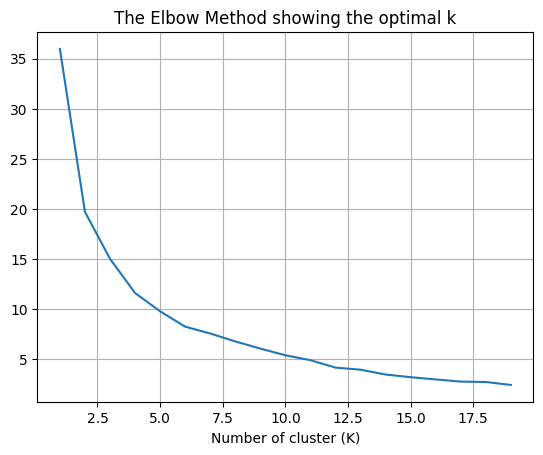

{1: 35.97749157953115,
 2: 19.710966847185638,
 3: 15.027270127700245,
 4: 11.6136040059872,
 5: 9.783682842495685,
 6: 8.250704457601557,
 7: 7.566939439295342,
 8: 6.778454719702812,
 9: 6.061214230797178,
 10: 5.3945060995107745,
 11: 4.903939445299827,
 12: 4.163289831259165,
 13: 3.9544700913165234,
 14: 3.471794152435568,
 15: 3.20743854744688,
 16: 2.9826410360678834,
 17: 2.764033841624208,
 18: 2.725022552118083,
 19: 2.4336121487613083}

In [16]:
# Optimasi jumlah cluster menggunakan Elbow Method
# Menampilkan nilai SSE untuk setiap jumlah cluster
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_scaled)
    df["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster (K)")
plt.title('The Elbow Method showing the optimal k')
plt.grid()
plt.show()

# tampilkan seluruh nilai SSE 
sse

Visualisasi

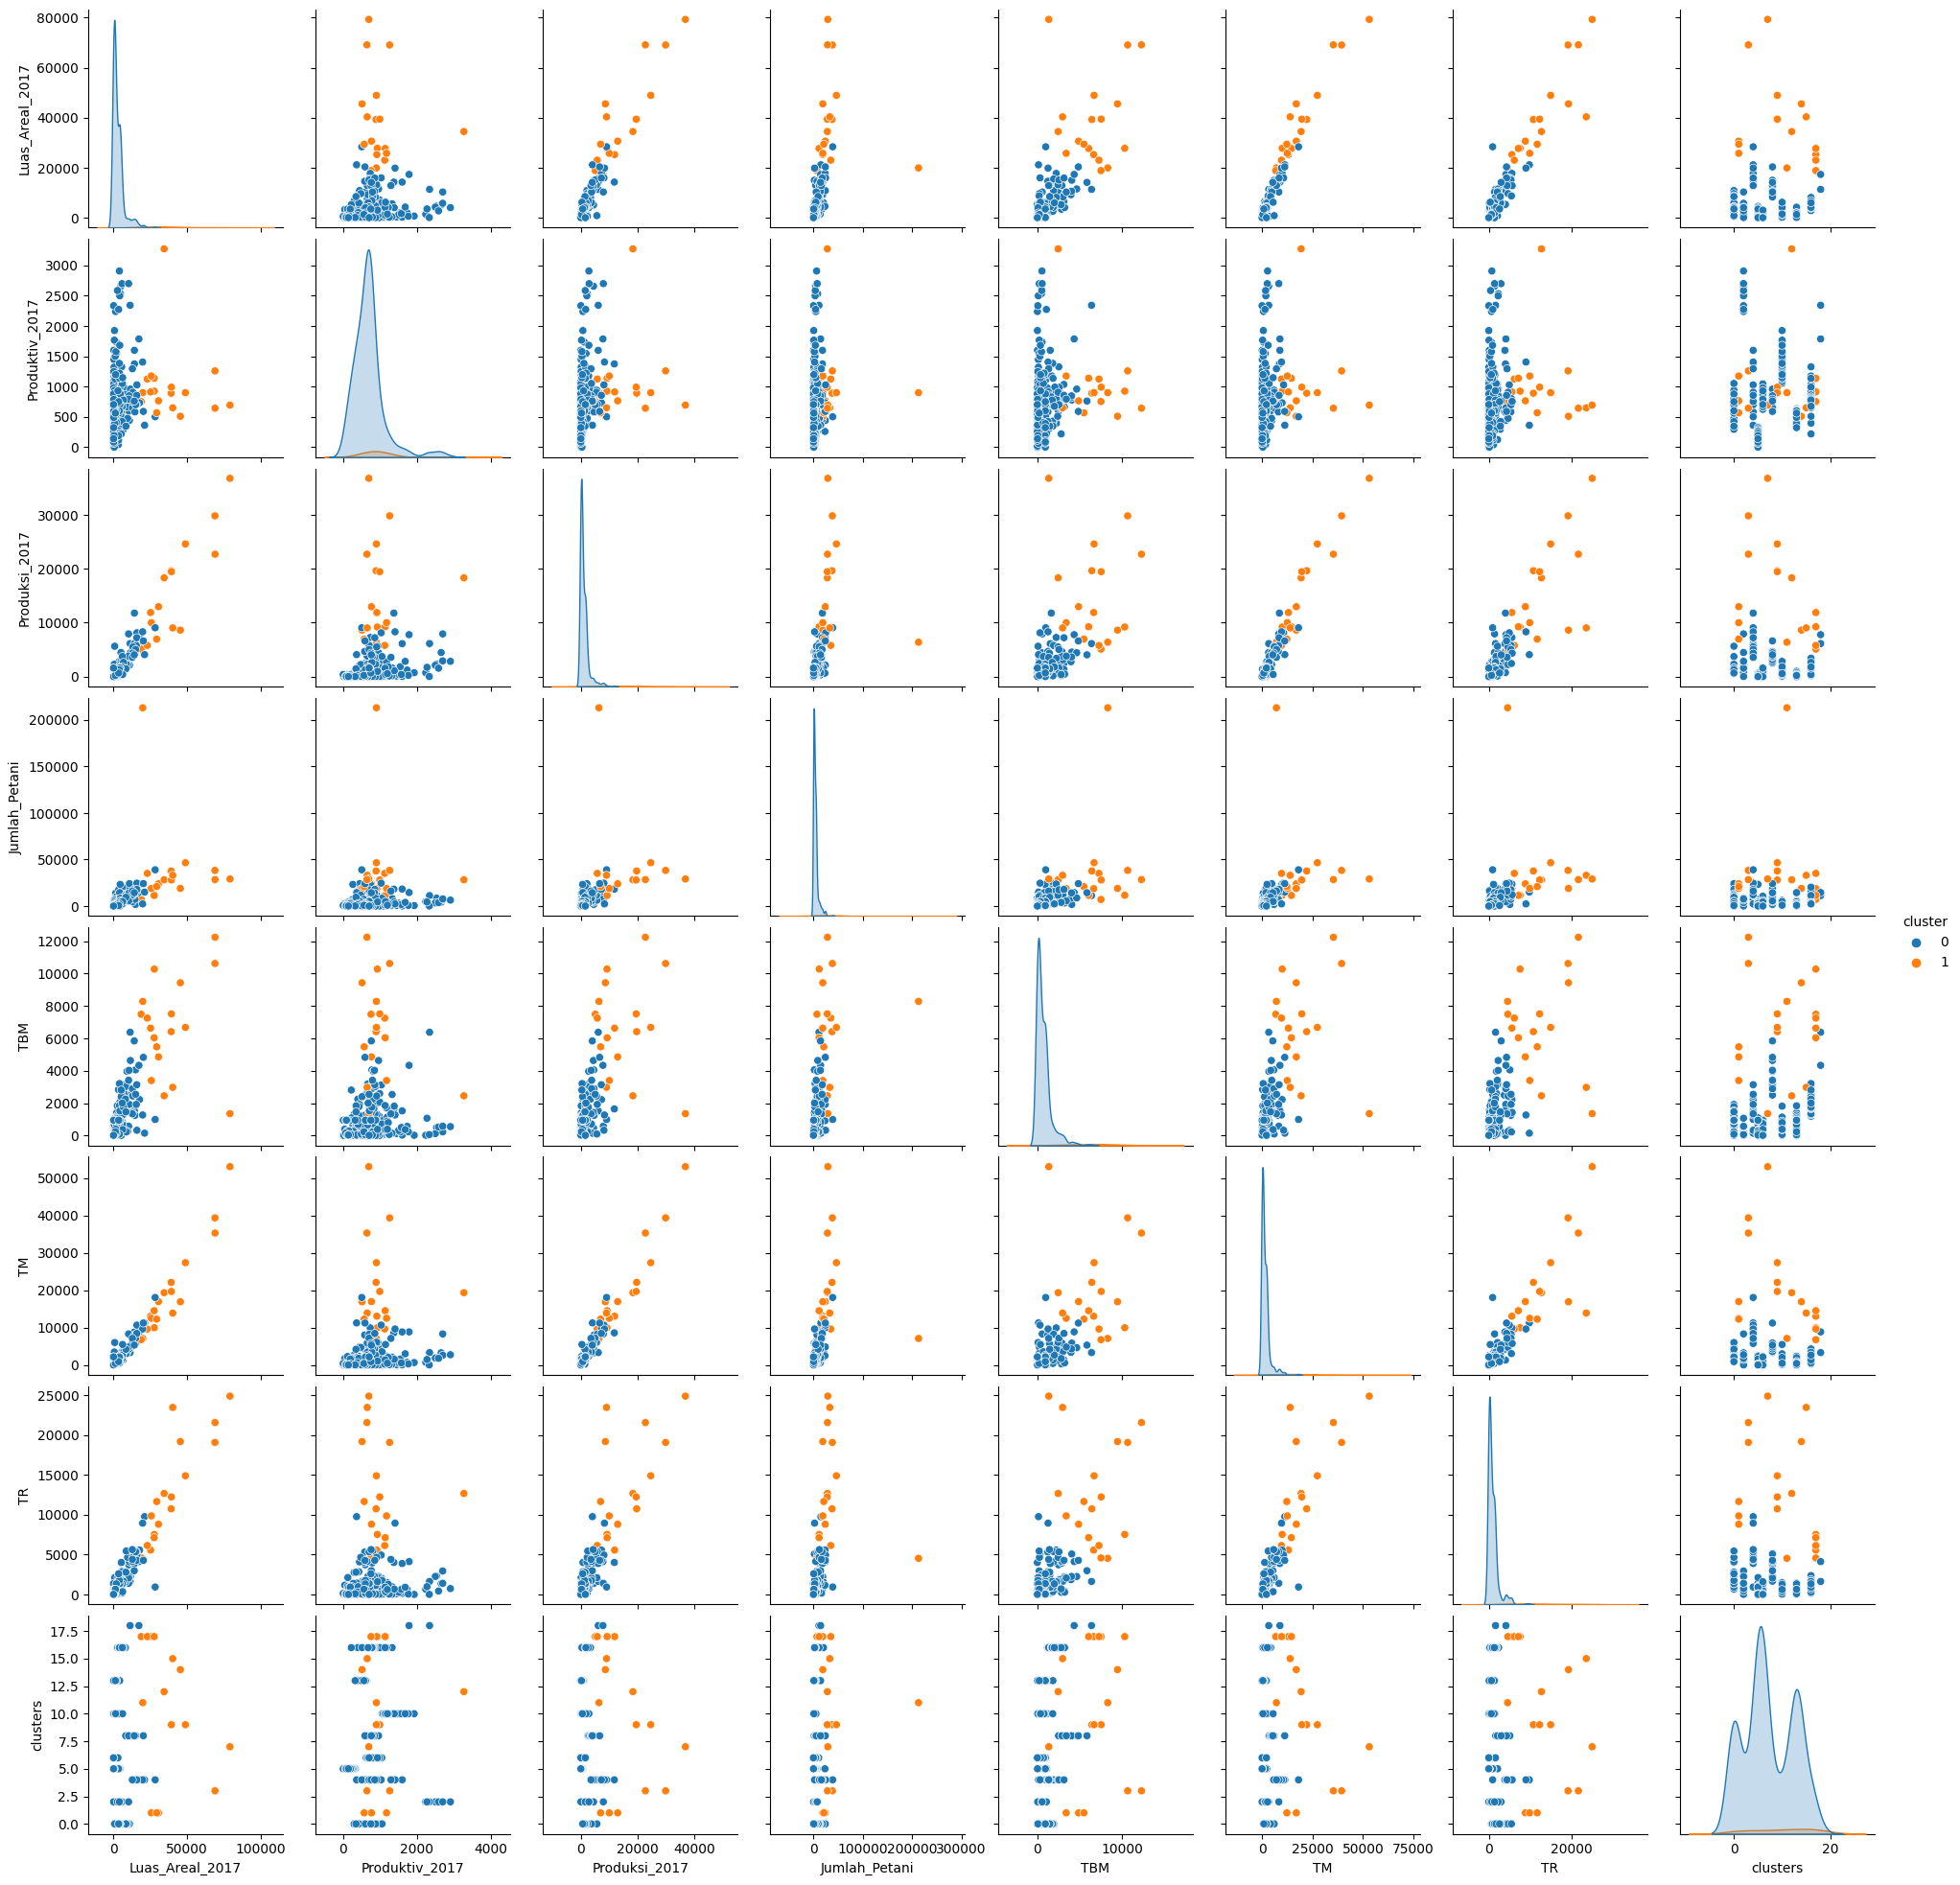

In [17]:
import seaborn as sns
sns.pairplot(df, hue='cluster')